In [1]:
#Importing libraries
import matplotlib.pyplot as plt
import mne
from pathlib import Path
import seaborn as sns

from deepjr.simulation import jr_typical_param
from deepjr.simulation import JRSimulator, EventRelatedExp, SimResults

# Genral Information

These are the values for the Jansen Rit Model which are available in the literature, particularly from [this paper](https://mathematical-neuroscience.springeropen.com/articles/10.1186/s13408-017-0046-4/tables/1). The value of $v_{max}$ was corrected from 5 Hz to 50 Hz, a more reasonable value and a value that compatible with other publications (e.g., [this one](https://link.springer.com/article/10.1007/s10827-013-0493-1#Tab1)). Minimum and maximum values are defined as per [the code of The Virtual Brain](https://docs.thevirtualbrain.org/_modules/tvb/simulator/models/jansen_rit.html).




| Parameter  | Description                                                                  | Typical value | min value | max value |
| ---------- | ---------------------------------------------------------------------------- | ------------- | --------- | --------- |
| $A_e$      | Average excitatory synaptic gain                                             | 3.25 mV       | 2.6 mV    | 9.75 mV   | 
| $A_i$      | Average inhibitory synaptic gain 	                                        | 22 mV         | 17.6 mV   | 110.0 mV  |
| $b_e$	     | Inverse of the time constant of excitatory postsynaptic potential            | 100 Hz        | 50 Hz     | 150 Hz    |
| $b_i$	     | Inverse of the time constant of inhibitory postsynaptic potential            | 50 Hz         | 25 Hz     | 75 Hz     |
| $C$	     | Average number of synapses between the populations 	                        | 135           | 65        | 1350      |
| $a_1$      | Average probability of synaptic contacts in the feedback excitatory loop     | 1.0           | 0.5       | 1.5       |
| $a_2$	     | Average probability of synaptic contacts in the slow feedback excitatory loop| 0.8           | 0.4       | 1.2       |
| $a_3$	     | Average probability of synaptic contacts in the feedback inhibitory loop     | 0.25          | 0.125     | 0.375     |
| $a_4$	     | Average probability of synaptic contacts in the slow feedback inhibitory loop| 0.25          | 0.125     | 0.375     |
| $v_{max}$  | Maximum firing rate of the neural populations (max. of sigmoid fct.)         | 50 Hz         |     -     |     -     | 
| $v_0$      | Value for which 50% of the maximum firing rate is attained 	                | 6 mV          | 3.12 mV   | 6.0 mV    |




In [2]:

import mne
import os
#Fetch all mne dataset if not dowloaded already 

data_path = Path(mne.datasets.sample.data_path(download=True, verbose=False))
sample_dir = data_path / "MEG" / "sample"
subjects_dir = data_path / "subjects"
mne.datasets.fetch_fsaverage()

os.environ['SUBJECTS_DIR'] = str(subjects_dir)

0 files missing from root.txt in /Users/deepatilwani/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /Users/deepatilwani/mne_data/MNE-fsaverage-data/fsaverage


### Getting and info structure, a montage, and a noise covariance matrix for simulation

In [3]:
# Set up the simulator. This also create a head model for EEG simulation. Using mne dataset fsaverage
jr_sim = JRSimulator()
parameters = dict(jr_typical_param)
# Set the experiment.
er_exp = EventRelatedExp(jr_sim.info)

Reading forward solution from /Users/deepatilwani/Documents/Phd_projects/DCM/Jansen-Rit-Model-Benchmarking-Deep-Learning/notebooks/fsaverage-fwd.fif.gz...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523 (FIFF_MNE_FORWARD_SOLUTION_GRAD)) not available
    Read EEG forward solution (8196 sources, 64 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


scale_factor has been deprecated and will be removed. Use scale instead.


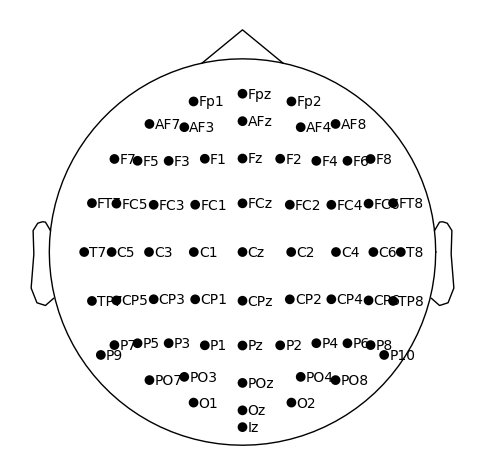

In [4]:
# Plot the montage with adjusted font size
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
mne.viz.plot_montage(jr_sim.montage, scale_factor=20, axes=ax, show_names=True)

fig.savefig('montage_plot.png', dpi=300, bbox_inches='tight')

### Run an example of simulation

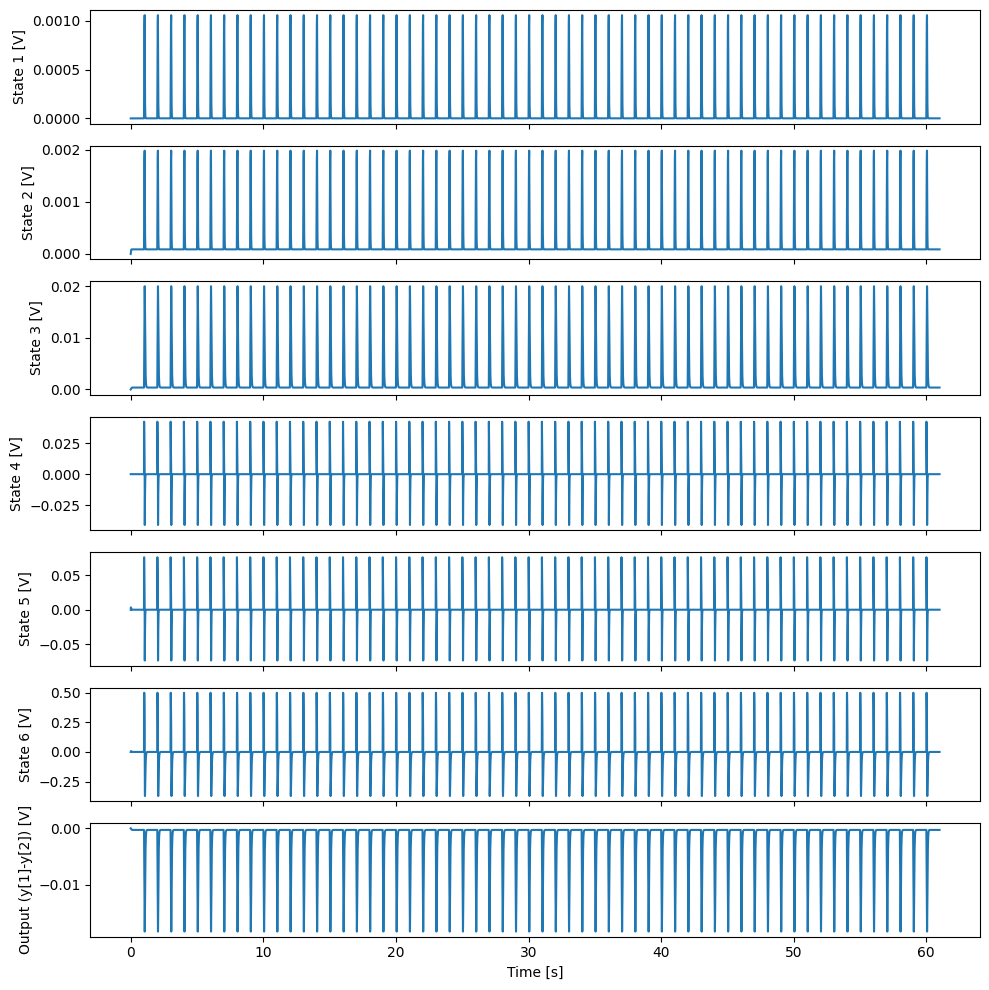

In [5]:
jr_sim.run_simulation(er_exp, parameters, jr_noise_sd=0.0)
jr_sim.plot_jr_results();

Reading labels from parcellation...
   read 1 labels from /Users/deepatilwani/mne_data/MNE-sample-data/subjects/fsaverage/label/lh.aparc.annot
   read 0 labels from /Users/deepatilwani/mne_data/MNE-sample-data/subjects/fsaverage/label/rh.aparc.annot
Setting up raw simulation: 1 position, "cos2" interpolation
Event information not stored
    Interval 0.000–1.000 s
Setting up forward solutions
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interval 0.000–1.000 s
    Interva

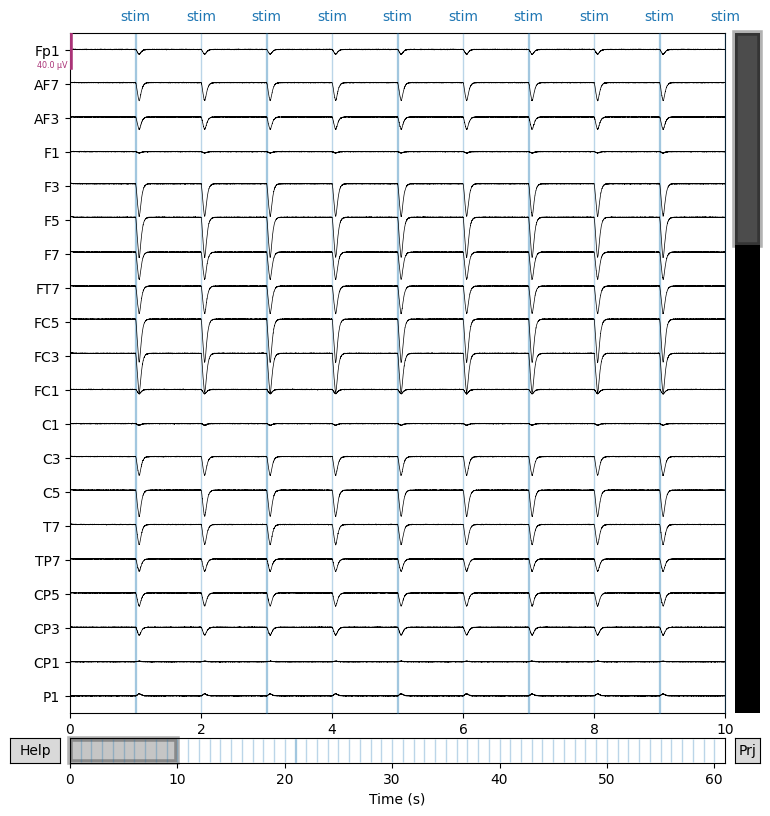

In [6]:
noise_fact = 1#1e3

jr_sim.generate_raw(seed=0, noise_fact=noise_fact)
jr_sim.raw.plot();

Not setting metadata
60 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated


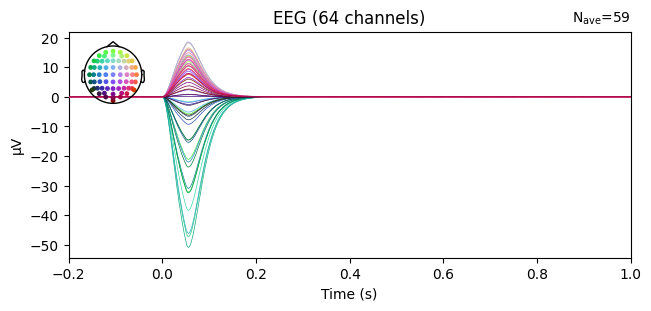

In [7]:
jr_sim.generate_evoked(er_exp)
jr_sim.evoked.plot();

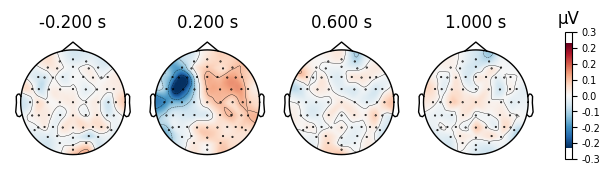

In [8]:
jr_sim.evoked.plot_topomap();

## EEG simulations

In [9]:
recompute = False

base_path = Path('deepjr_training_data')
base_path.mkdir(exist_ok=True)
method = 'normal'  # normal distribution of parameters
nb_sims = 1000
sim_results = SimResults(nb_sims, noise_fact, base_path)

if not sim_results.full_path.exists() or recompute:
    # Simulation per parameter calling the function
    mne.set_log_level(verbose=False)
    jr_sim.simulate_for_parameter(er_exp, method=method, 
                                  nb_sims=nb_sims, noise_fact=noise_fact,
                                  base_path=base_path, use_tqdm=True)

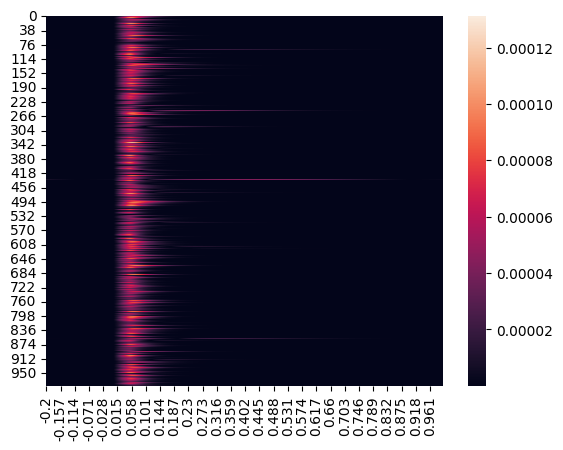

In [10]:
sim_results = SimResults(nb_sims, noise_fact, base_path)
sim_results.load()
sim_results.clean()
sim_results.plot_evoked_heatmap()

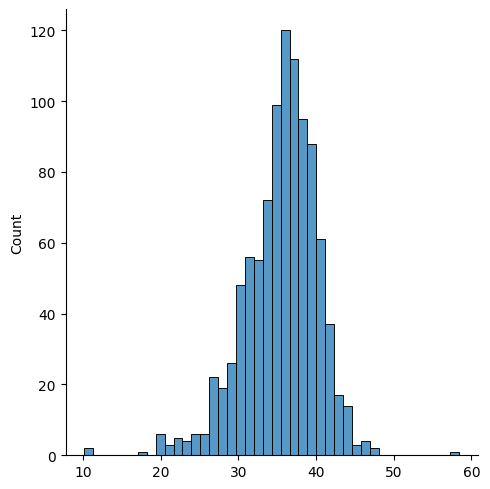

In [11]:
sns.displot(sim_results.snr)

In [12]:
noise_fact

1

Epoch [1/50], Loss: 0.2259
Epoch [2/50], Loss: 0.0320
Epoch [3/50], Loss: 0.0287
Epoch [4/50], Loss: 0.0286
Epoch [5/50], Loss: 0.0287
Epoch [6/50], Loss: 0.0283
Epoch [7/50], Loss: 0.0279
Epoch [8/50], Loss: 0.0290
Epoch [9/50], Loss: 0.0279
Epoch [10/50], Loss: 0.0264
Epoch [11/50], Loss: 0.0254
Epoch [12/50], Loss: 0.0259
Epoch [13/50], Loss: 0.0258
Epoch [14/50], Loss: 0.0252
Epoch [15/50], Loss: 0.0255
Epoch [16/50], Loss: 0.0255
Epoch [17/50], Loss: 0.0257
Epoch [18/50], Loss: 0.0252
Epoch [19/50], Loss: 0.0250
Epoch [20/50], Loss: 0.0248
Epoch [21/50], Loss: 0.0239
Epoch [22/50], Loss: 0.0236
Epoch [23/50], Loss: 0.0233
Epoch [24/50], Loss: 0.0225
Epoch [25/50], Loss: 0.0235
Epoch [26/50], Loss: 0.0235
Epoch [27/50], Loss: 0.0230
Epoch [28/50], Loss: 0.0223
Epoch [29/50], Loss: 0.0234
Epoch [30/50], Loss: 0.0217
Epoch [31/50], Loss: 0.0237
Epoch [32/50], Loss: 0.0233
Epoch [33/50], Loss: 0.0220
Epoch [34/50], Loss: 0.0225
Epoch [35/50], Loss: 0.0231
Epoch [36/50], Loss: 0.0220
E

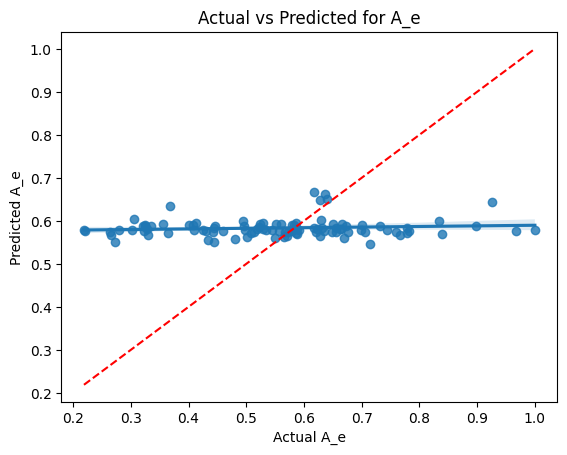

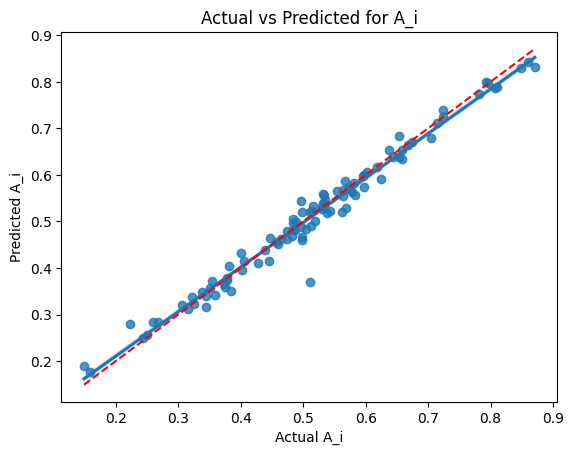

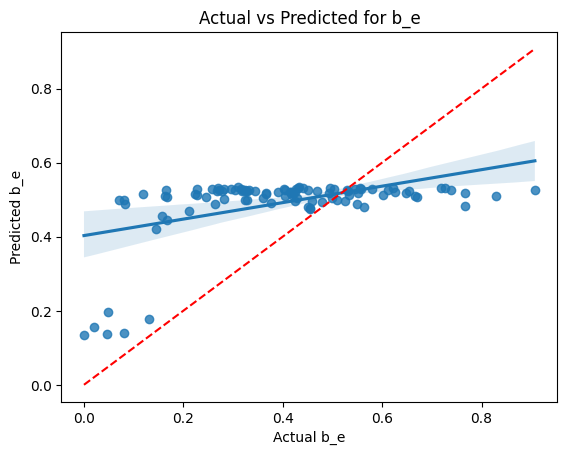

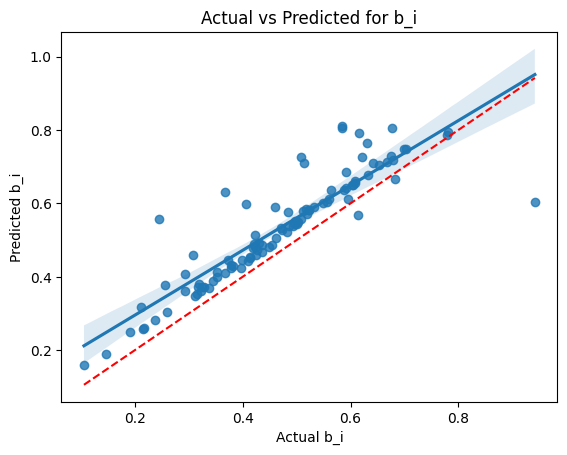

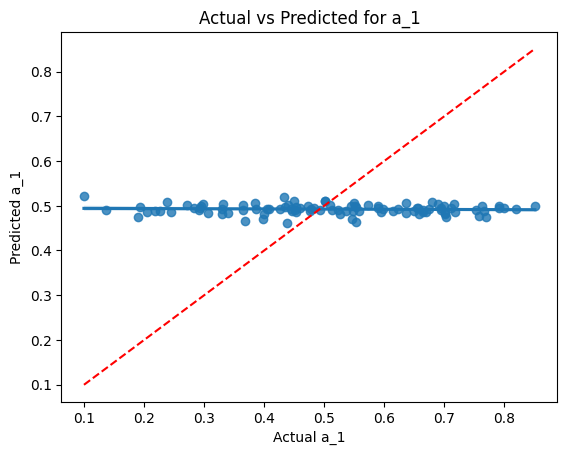

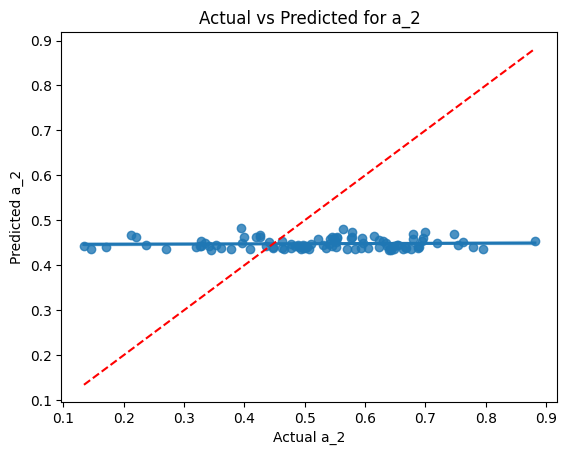

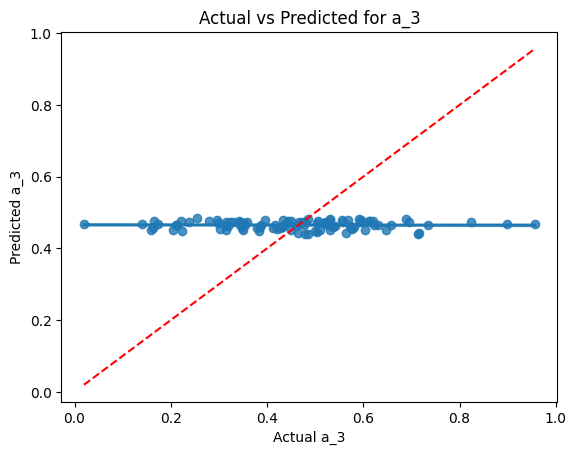

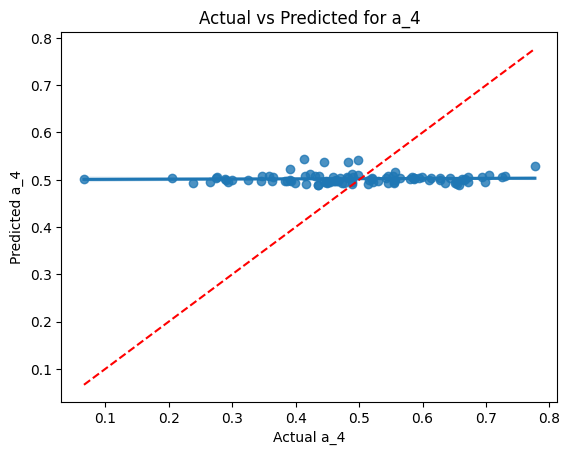

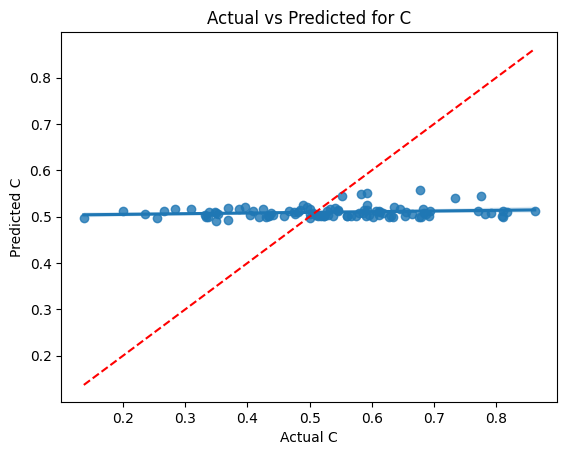

Correlation for A_e: 0.1143
Correlation for A_i: 0.9882
Correlation for b_e: 0.4891
Correlation for b_i: 0.8945
Correlation for a_1: -0.0668
Correlation for a_2: 0.0490
Correlation for a_3: -0.0192
Correlation for a_4: 0.0432
Correlation for C: 0.1802


In [ ]:
# Correct the import
from deepjr.transformer import EEGTransformer, JRInvDataLoader

noise_fact = 1

path = "./deepjr_training_data"
estim_params = ('A_e', 'A_i', 'b_e', 'b_i', 'a_1', 'a_2', 'a_3', 'a_4', 'C')
nb_sims = 1000

# Initialize the Data Loader
data_loader = JRInvDataLoader(nb_sims=nb_sims, path=path, estim_params=estim_params, noise_fact=noise_fact)
data_loader.prepare_data()

# Get dimensions: assume X_train shape is (num_samples, num_channels, num_timepoints)
num_channels = data_loader.X_train.shape[1]
num_timepoints = data_loader.X_train.shape[2]

model = EEGTransformer(
    num_channels=num_channels, 
    num_timepoints=num_timepoints,
    output_dim=len(estim_params), 
    estim_params=estim_params,
    embed_dim=256,        # Increased embedding dimension
    num_heads=8,          # Increased number of attention heads (256 is divisible by 8)
    hidden_dim=128,       
    hidden_ffn_dim=512,   # Increased feed-forward network hidden dimension
    intermediate_dim=1024,# Increased intermediate dimension
    ffn_output_dim=256,   # Increased FFN output dimension
    dropout=0.2           # Slightly higher dropout for better regularization
)

# Train the model
model.train_model(data_loader.X_train, data_loader.y_train, data_loader.X_val, data_loader.y_val, epochs=50, batch_size=32)

# Evaluate the model
model.evaluate_model(data_loader.X_test, data_loader.y_test)

# Plot predictions vs. actual values
model.plot_test_regressions(data_loader.X_test, data_loader.y_test)

# Print correlations between predictions and actual values
model.print_correlations(data_loader.X_test, data_loader.y_test);

In [ ]:
# New JR LSTM Modelf
from deepjr.jr_inv_lstm_model import JRInvLSTMModel, JRInvDataLoader

# Set parameters
path = Path("./deepjr_training_data")
estim_params = ('A_e', 'A_i', 'b_e', 'b_i', 'a_1', 'a_2', 'a_3', 'a_4', 'C')
nb_sims = 1000
noise_fact = noise_fact
output_dir = "./jr_transformer_output"

## Initialize the data loader and prepare data
data_loader = JRInvDataLoader(nb_sims=nb_sims, path=path, estim_params=estim_params, noise_fact=noise_fact)

# Prepare the data (load and scale)
data_loader.prepare_data()
# Initialize the LSTM model
seq_length = data_loader.X_train.shape[1]  # (number of time steps)
input_dim = data_loader.X_train.shape[2]   # (number of features, EEG channels)

model = JRInvLSTMModel(input_dim=input_dim, 
                       seq_length=seq_length,  # Pass seq_length
                       num_params=len(estim_params),
                       estim_params=estim_params,
                       hidden_size=64, num_layers=2, dropout=0.2)

# Train the model using JRInvDataLoader's train_model method
model.train_model(data_loader.X_train, data_loader.y_train, epochs=50, batch_size=32)



Epoch [1/50], Loss: 0.0017
Epoch [2/50], Loss: 0.0009
Epoch [3/50], Loss: 0.0008
Epoch [4/50], Loss: 0.0008
Epoch [5/50], Loss: 0.0008
Epoch [6/50], Loss: 0.0008
Epoch [7/50], Loss: 0.0008
Epoch [8/50], Loss: 0.0008
Epoch [9/50], Loss: 0.0008
Epoch [10/50], Loss: 0.0008
Epoch [11/50], Loss: 0.0008
Epoch [12/50], Loss: 0.0007
Epoch [13/50], Loss: 0.0007
Epoch [14/50], Loss: 0.0007
Epoch [15/50], Loss: 0.0007
Epoch [16/50], Loss: 0.0007
Epoch [17/50], Loss: 0.0007
Epoch [18/50], Loss: 0.0007
Epoch [19/50], Loss: 0.0007
Epoch [20/50], Loss: 0.0007
Epoch [21/50], Loss: 0.0007
Epoch [22/50], Loss: 0.0007
Epoch [23/50], Loss: 0.0007
Epoch [24/50], Loss: 0.0007
Epoch [25/50], Loss: 0.0007
Epoch [26/50], Loss: 0.0007
Epoch [27/50], Loss: 0.0007
Epoch [28/50], Loss: 0.0006
Epoch [29/50], Loss: 0.0007
Epoch [30/50], Loss: 0.0006
Epoch [31/50], Loss: 0.0007
Epoch [32/50], Loss: 0.0006
Epoch [33/50], Loss: 0.0006
Epoch [34/50], Loss: 0.0006
Epoch [35/50], Loss: 0.0006
Epoch [36/50], Loss: 0.0006
E

Test MSE Loss: 0.0345


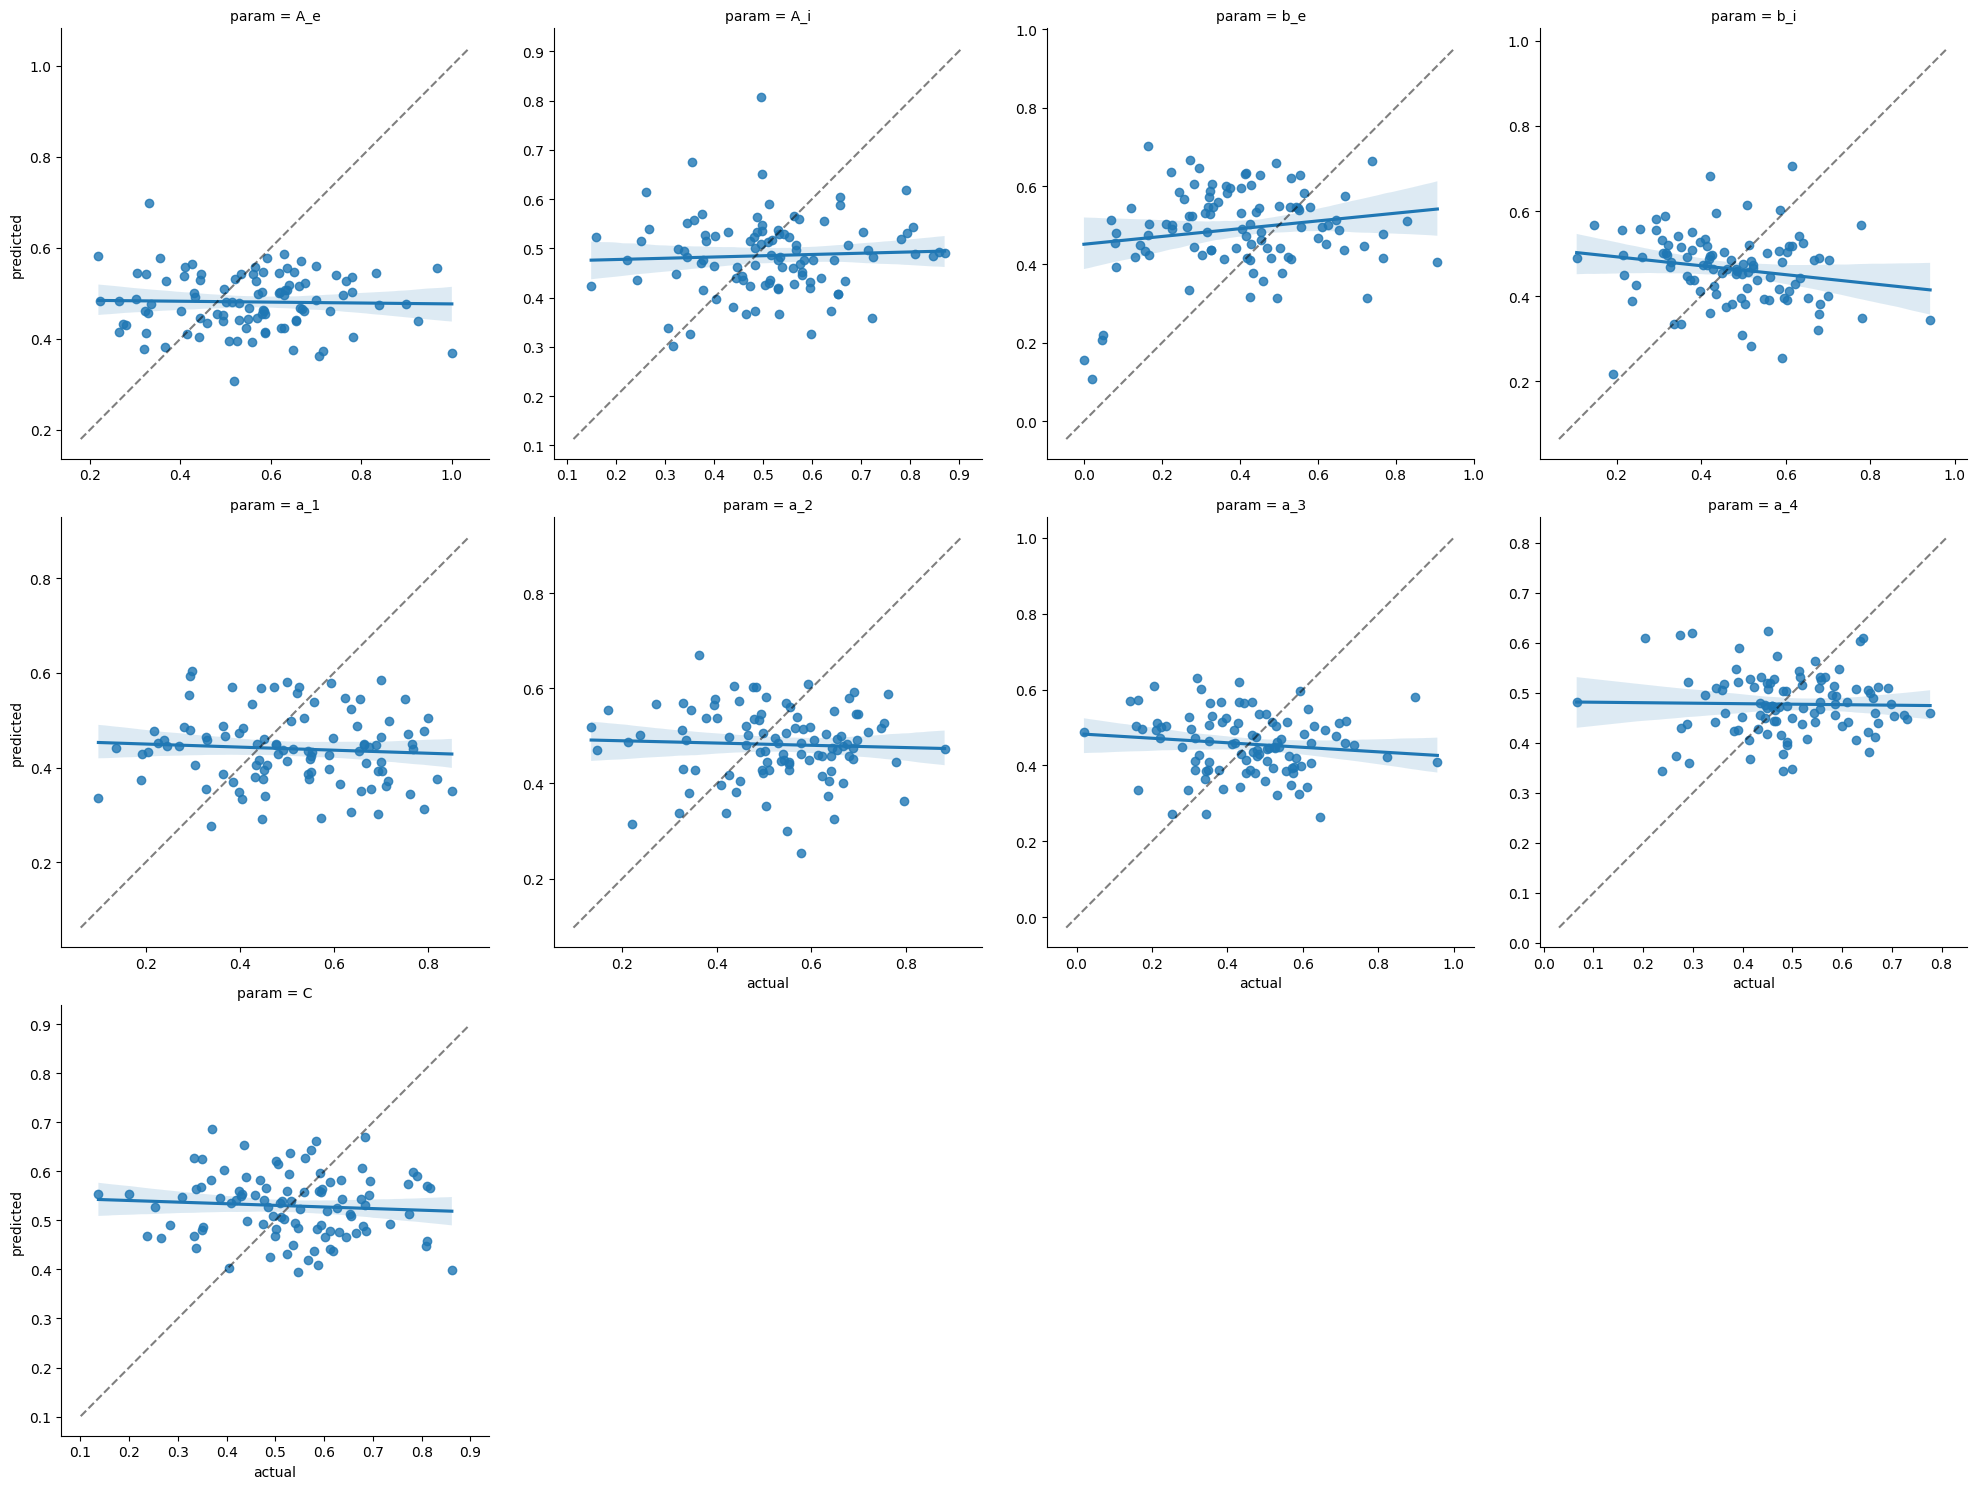

In [15]:
# Evaluate the model
mse_loss = model.evaluate_model(data_loader.X_test, data_loader.y_test)

# Plot predictions vs actual values
model.plot_test_regressions(data_loader.X_test, data_loader.y_test, estim_params)


In [16]:

corr = model.print_correlations(data_loader.X_test, data_loader.y_test, estim_params)

Pearson correlation for A_e: -0.025965949017704118
Pearson correlation for A_i: 0.05054277969463769
Pearson correlation for b_e: 0.17859156166759407
Pearson correlation for b_i: -0.19156170384869317
Pearson correlation for a_1: -0.07492660889698528
Pearson correlation for a_2: -0.04735310091112222
Pearson correlation for a_3: -0.12448387358407292
Pearson correlation for a_4: -0.020745209006784622
Pearson correlation for C: -0.07547866705023139
